# Hypothesis testing - 2

### Cutlets.csv Dataset

### A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

### Business objective / problem 

    Objective: To compare and find if there is any significant deviation in the diameter of the cutlet, of two units A & B. 

    Problem: The managers intention may be that if the sizes are significantly different. Customers would choose the cutlets of larger size, as price being constant. Also customers will feel discriminated when the smaller size cutlets are delivered. Which would in turn lead to customer dissatisfaction / complaints. Inter-Division and Intra-Division consistency is the key for customer satisfaction. On the other hand size of the cutlet has direct relationship to raw material consumed. In a large scale production set up this would make a large difference.

    Parameters on for Data Science point of view

    Let dia_DA =  diameter of the cutlet produced by unit A
    Let dia_DB =  diameter of the cutlet produced by unit B
    Check if DA > DB significantly or vice versa
    Alpha (a) = 0.05 or 5%

### Data Collection
    We need to collect or randomly sample the data set from the population. In rare cases we need to opt for survey inorder to collect the primary data. Mostly we use the secondary data for analysis. However in this case we are provided with a randomly chosen data set. Hence we can proceed with out analysis.
    
    Let us use the given data : “cutlet.csv”

In [1]:
# First thing first Import all the libraries
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as plt
import seaborn as sns
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from statsmodels.stats.proportion import proportions_ztest

In [2]:
DF = pd.read_csv('Cutlets.csv')

### Data preparation / cleaning
#### Check the attributes of the data, check the integrity of data import into the system

In [3]:
DF.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [4]:
DF.shape

(35, 2)

#### Check for data types and decide proper data type for analysis

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


#### Check for null values ------- No null values

In [6]:
DF.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

#### Check for duplicates ------------ no duplicates¶

In [7]:
print(DF[DF.duplicated()].sum())
DF[DF.duplicated()]

Unit A    0.0
Unit B    0.0
dtype: float64


,Unit A,Unit B


#### Segregate the data in two parts to represent UNIT ‘A’ & UNIT ‘B’

In [8]:
dia_CA = DF['Unit A']
dia_CB = DF['Unit B']

In [9]:
print(pd.DataFrame(dia_CA.head()) , '\n\n', pd.DataFrame(dia_CB.tail()))

   Unit A
0  6.8090
1  6.4376
2  6.9157
3  7.3012
4  7.4488 

     Unit B
30  7.0992
31  7.1180
32  6.6965
33  6.5780
34  7.3875


#### Compare the means of dia_CA, dia_CB (first moment of business decision)

In [10]:
# it is assumed that the unit of measurement is in centi meters - 'cm'
CA_mean = round( dia_CA.mean(),2)
CB_mean = round(dia_CB.mean(),2)
print('Difference between average diameter of cutlet A {:.2f}cm & cutlet B {:.2f}cm = {:.2f} ;'.format(CA_mean,CB_mean,(CA_mean-CB_mean)))
print('\n\n', 'IS the Difference significant??','\n\n')
print('Assuming that difference of {:.2f}cm is not significant we proceed with next analysis'.format(CA_mean-CB_mean))

Difference between average diameter of cutlet A 7.02cm & cutlet B 6.96cm = 0.06 ;


 IS the Difference significant?? 


Assuming that difference of 0.06cm is not significant we proceed with next analysis


### ------Check for type distribution--------
    our base assumption is that the population of cutlets of both unit A and unit B are normally or nearly normally distributed

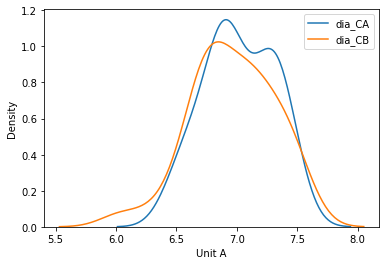

In [11]:
sns.kdeplot(dia_CA)
sns.kdeplot(dia_CB)
plt.pyplot.legend(['dia_CA' , 'dia_CB'])

In [12]:
# sns.displot(dia_CA, kind='kde' )
# sns.displot(dia_CB, kind = 'kde')
# plt.pyplot.legend(['dia_CA' , 'dia_CB'])

In [13]:
# sns.histplot(dia_CA, kde = True)
# sns.histplot(dia_CB)
# plt.pyplot.legend(['dia_CA' , 'dia_CB'])

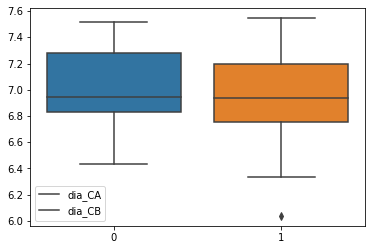

In [14]:
sns.boxplot(data= [dia_CA, dia_CB])
plt.pyplot.legend(['dia_CA' , 'dia_CB'])

There is no conclusive evidence that the samples are distributed normally. Further there is one outlier in dataset "dia_CB". Inorder to pass an opinion on the Population of Cutlets we need to check if the two populations of cutlets follow the normal distribution. This can be done using "SHAPIRO TEST" or "ANDERSON DARLING TEST". 

#### -----Test for normal population Distribution - Shapiro-----
    H0 = Both samples are drawn from normally distributed populations
    H1 = Atleast one of the samples are not drawn from normally distributed popluation

In [15]:
stat1 , p1 = stats.shapiro(dia_CA)
stat2 , p2 = stats.shapiro(dia_CB)
print("pvlaue for Unit A {:.2f}% and pvalue for Unit B {:.2f}%".format((p1*100),(p2*100)))

pvlaue for Unit A 32.00% and pvalue for Unit B 52.25%


As "pvalues" of both samples are greater than Alpha(5%) in Shapiro Test, We can conclude that we don't have enought evidence to reject null hyphothesis. Hence be shall hold/assumed that both samples are drawn from normally distributed populations

#### -----Test for normal population Distribution - Anderson-----

In [16]:
dfA = pd.DataFrame(stats.anderson(dia_CA), index = ['statistic','critical_values','significance_level'],columns = ['Anderson result for Unit A'])
dfA

,Anderson result for Unit A
statistic,0.433095
critical_values,"[0.527, 0.6, 0.719, 0.839, 0.998]"
significance_level,"[15.0, 10.0, 5.0, 2.5, 1.0]"


In [17]:
dfB = pd.DataFrame(stats.anderson(dia_CB), index = ['statistic','critical_values','significance_level'],columns = ['Anderson result for Unit B'])
dfB

,Anderson result for Unit B
statistic,0.26123
critical_values,"[0.527, 0.6, 0.719, 0.839, 0.998]"
significance_level,"[15.0, 10.0, 5.0, 2.5, 1.0]"


In case of Anderson test we compare that statistic with the critical values and we look for Statistic Greater than Critical values for given significance.

In our case both samples have statistic less than critical values for all signigicance. hence we can conclude that both samples are drawsn from normally distributed populations.

### ------Check for Varience of the populations--------
    
    our base assumption is that the population of cutlets of both unit A and unit B Have same varience
    
    In order to check varience of the population using the samples drwan we use levene test.
    
    H0 = varience of both groups are equal 
    H1 = varience of both groups are unequal

In [18]:
lStat, lP = stats.levene(dia_CA , dia_CB)
print('\npvalue for levene test is {:.2f}%'.format(lP*100))
# stats.levene(dia_CA , dia_CB,)


pvalue for levene test is 41.76%


as it can be noted that the pavlue is greater than alpha 0.05(5%), we can conclude that there is not enough evidence to reject null hypothesis. Hence, we assume that the variences are equal or we can say that the variations are not significant. Hence continue our study.

### Data analysis in the context of business case

#### Constructing Hypothesis  
    H0 = mean of dia_CA - mean of dia_CB = 0
    H1 = mean of dia_CA - mean of dia_CB != 0

#### applying two sample two tail test
    In the absence of population parameters especially std deviation (sigma) our natural choice of statistical test is ttest
    Alpha (a) = 0.05 or 5% for t test

#### Calculate p values using ttest

In [19]:
tStatistic, Pvalue = stats.ttest_ind(dia_CA,dia_CB)
print('pvalue : {0} , tstatistic : {1}'.format(tStatistic,Pvalue))

pvalue : 0.7228688704678061 , tstatistic : 0.4722394724599501


#### Check if p value id less than alpha
    

In [20]:
if Pvalue <=0.05:
    print('There is sufficient evidence to reject null Hypothesis')
else:
    print('The is not enough evidence to reject null Hypothesis. \nHence, we shall continue to trust Null hypothesis, \nMEANING THERE MAY BE VARIATION IN THE DIAMETER OF CUTLET BUT IT IS NOT SIGNIFICANT TO TAKE ACTION')

The is not enough evidence to reject null Hypothesis. 
Hence, we shall continue to trust Null hypothesis, 
MEANING THERE MAY BE VARIATION IN THE DIAMETER OF CUTLET BUT IT IS NOT SIGNIFICANT TO TAKE ACTION


### Conclusion - inference

#### AS noted above, as our p value is less than the alpha, we shall continue to work under null hypothesis. We do not have enough evidence to discredit the null hypothesis. So, We can conclude that THERE IS NO SIGNIFICANT DIFFERENCE IN THE DIAMETER OF CUTLET. However, this does not mean there is no difference in the diameter of cutlets of both units. It only means that, the difference is not significant enough to be worried about.